# K Nearest Neighbors Regression

KNN regression makes a prediction for a new instance by taking the average target value for the k closest points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from warnings import filterwarnings

filterwarnings('ignore')

# Data Preparation

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'][20:1265])


Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by

In [4]:
print(boston['data'].shape, boston['target'].shape)

X = boston['data']
y = boston['target']

(506, 13) (506,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (379, 13)
X_test: (127, 13)

y_train: (379,)
y_test: (127,)


# Distance metrics

Minkowski distance is a metric that measures the distance between two n-dimensional points.

For $\vec{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n\end{pmatrix} $ and $\vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\end{pmatrix}$ the Minkowski distance of order $p \ge 1$  for $\vec{x}$ and $\vec{y}$ is given by:

$$
D(\vec{x}, \vec{y}) = \bigg(\sum_{i=1}^n|x_i - y_i|^p\bigg)^{1/p}
$$

Minkowski distance is a generalization of Manhattan ($p=1$) and Euclidean ($p=2$) distances.

In [6]:
# Find the distance between the given instance
# and all points in the training set
instance = X_test[0]
target = y_test[0]

print('instance:')
for k, v in zip(boston['feature_names'], instance):
    print(f'\t{k:8}:{v:10}')
    
print('\ntarget (MEDV) :', target)

instance:
	CRIM    :   0.09178
	ZN      :       0.0
	INDUS   :      4.05
	CHAS    :       0.0
	NOX     :      0.51
	RM      :     6.416
	AGE     :      84.1
	DIS     :    2.6463
	RAD     :       5.0
	TAX     :     296.0
	PTRATIO :      16.6
	B       :     395.5
	LSTAT   :      9.04

target (MEDV) : 23.6


In [7]:
# minkowski distances for p = 1, 2, 3
dist1 = (np.abs(X_train - instance) ** 1).sum(axis=1) ** (1/1)
dist2 = (np.abs(X_train - instance) ** 2).sum(axis=1) ** (1/2)
dist3 = (np.abs(X_train - instance) ** 3).sum(axis=1) ** (1/3)

print('p = 1:', dist1[:5])
print()
print('p = 2:', dist2[:5])
print()
print('p = 3:', dist3[:5])

p = 1: [122.30605 445.36903 139.0655  203.08867 227.72584]

p = 2: [103.45453327 326.03031867  85.37387011 117.99457704 151.17716877]

p = 3: [103.01958254 311.76333109  80.83718433 109.83115029 139.4861913 ]


# The Closest K points

In [8]:
k = 5

dist1_sorted_indx = dist1.argsort()
dist2_sorted_indx = dist2.argsort()
dist3_sorted_indx = dist3.argsort()

closest_k1 = dist1_sorted_indx[:k]
closest_k2 = dist2_sorted_indx[:k]
closest_k3 = dist3_sorted_indx[:k]

In [9]:
dist1[dist1_sorted_indx[:5]]

array([14.35973, 16.78836, 18.88991, 21.69842, 22.1781 ])

In [10]:
print('The indices of the closest', k, 'points.\n')
print('p = 1:', closest_k1)
print('p = 2:', closest_k2)
print('p = 3:', closest_k3)

The indices of the closest 5 points.

p = 1: [115 220 333 178 346]
p = 2: [346 178 220 115 357]
p = 3: [346 178 357 220 317]


In [11]:
print('The targets of the closest', k, 'points.\n')
print('p = 1:', y_train[closest_k1])
print('p = 2:', y_train[closest_k2])
print('p = 3:', y_train[closest_k3])

The targets of the closest 5 points.

p = 1: [24.6 29.9 22.6 23.8 21.6]
p = 2: [21.6 23.8 29.9 24.6 22.8]
p = 3: [21.6 23.8 22.8 29.9 16.2]


# Making predictions

The prediction is just average of the closest points targets.

21.413385826771652
8.368222251726307

22.907915567282323
9.41709782996042


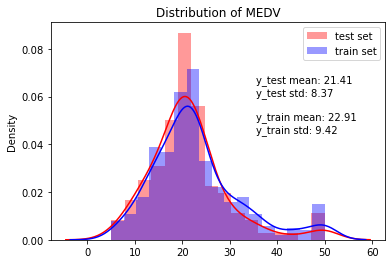

In [49]:
print(y_test.mean())
print(y_test.std())
print()
print(y_train.mean())
print(y_train.std())

description = f'''y_test mean: {y_test.mean():.2f}
y_test std: {y_test.std():.2f}

y_train mean: {y_train.mean():.2f}
y_train std: {y_train.std():.2f}'''

fig = plt.figure()
fig.text(0.6, .50, description)

sns.distplot(y_test, color='red', label='test set')
sns.distplot(y_train, color='blue', label='train set')
plt.title('Distribution of MEDV')
plt.legend();

In [13]:
pred1 = y_train[closest_k1].mean()
pred2 = y_train[closest_k2].mean()
pred3 = y_train[closest_k3].mean()


print(
f'''
Prediction:

    p = 1: {pred1}
    p = 2: {pred2}
    p = 3: {pred3}
''')



Prediction:

    p = 1: 24.5
    p = 2: 24.54
    p = 3: 22.86



# Batch predictions

In [14]:
p = 2

# Every train instance - every test instance
dist2 = (np.abs(X_train - X_test[:,np.newaxis,:]) ** p).sum(axis=2)
# each row is an instance from X_test 
# each column is the distance from the instance 
# in X_test to each instance from X_train
dist2.shape

(127, 379)

In [15]:
# sort each row
dist2_indx = dist2.argsort()
dist2_indx

array([[346, 178, 220, ..., 160,  59, 151],
       [ 57, 141, 349, ..., 176,  59, 151],
       [299,  43, 116, ...,   3, 201, 143],
       ...,
       [221, 288, 312, ..., 176,  59, 151],
       [ 36, 244, 128, ..., 176,  59, 151],
       [286, 146,  15, ..., 176,  59, 151]], dtype=int64)

In [16]:
# the classes of the closest 5 points
closest5 = y_train[dist2_indx][:,:5]
closest5

array([[21.6, 23.8, 29.9, 24.6, 22.8],
       [33.1, 32. , 33.2, 25. , 23.4],
       [15.2, 20.1,  8.5, 16.7, 12.5],
       [21.7, 46.7, 23.9, 23.1, 29.4],
       [17.1, 21.7, 12.6, 17.7, 14.6],
       [50. , 20.4, 17.5, 21.5, 50. ],
       [17.5, 19.6, 16.2, 21.6, 23.8],
       [13.3, 16.2, 18.4, 14.3, 18.1],
       [20.2, 21.7, 17.7, 13.8, 16.7],
       [17.5, 27.5, 19.3, 20.4, 21.2],
       [23. , 19.3, 28.7, 23.9, 22. ],
       [15. , 27.1, 17.5, 19.6, 21. ],
       [ 8.4, 14.1, 13.4, 14.5, 11. ],
       [21.7, 24.5, 21.2, 17.5, 23.1],
       [29.9, 18.9, 22.6, 24.6, 22.5],
       [19.1, 23.2, 20.6, 23.2, 25. ],
       [20.5, 21.4, 17.3, 20.3, 15.7],
       [11.9, 12.1, 13.9, 17.8, 14.6],
       [37.3, 27.9, 44. , 34.9, 31.6],
       [11.5, 13.3,  8.5, 12.5,  7.2],
       [35.1, 25. , 23.4, 24.7, 21.1],
       [33.1, 32. , 33.2, 23.4, 25. ],
       [13.6, 16.6, 14.5, 21. , 18.2],
       [20.6, 21.4, 18.9, 22. , 22.5],
       [14.9, 16.7, 21.9, 27.9, 13. ],
       [15.2, 19.9, 16.8,

In [17]:
predictions = closest5.mean(axis=1)
predictions.shape

(127,)

In [18]:
y_test.shape

(127,)